In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


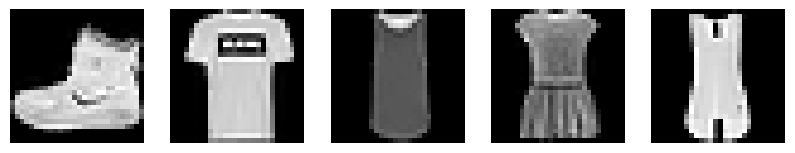

In [3]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos

# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()


 Consignas para los alumnos:
 1. Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
 2. Reordena las capas del modelo para que coincidan con el modelo correcto.
 3. Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
 4. Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
 5. Calcula el accuracy del modelo corregido.

 PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 PS2: para el entrenamiento no màs de 5 e`pocas y validarlo.

Capas a usar.

In [4]:
#Dense(10, activation='softmax')
#Dense(256, activation='relu'),
#Dropout(0.2),
#Dropout(0.2),
#Dense(128, activation='relu'),
#Flatten(input_shape=(28, 28)),
#Dense(512, activation='relu'),


In [ ]:
# Explicación para los alumnos:
# Esta red neuronal recibe imágenes de 28x28 píxeles en escala de grises y las clasifica en 10 categorías de ropa.
# Utiliza capas densas (fully connected) con activación ReLU y una capa final con activación softmax para la clasificación.
# Además, emplea Dropout para reducir el sobreajuste.


# **Capas reordenadas**
Importe tambien Input: "from tensorflow.keras.layers import Dense, Flatten, Dropout, **Input**" y lo mencione luego explicitamente Input(shape=(28, 28)porque si no me daba error

In [5]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# **Compilacion y entrenamiento**


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7501 - loss: 0.6883 - val_accuracy: 0.8486 - val_loss: 0.4092
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8480 - loss: 0.4195 - val_accuracy: 0.8625 - val_loss: 0.3703
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8594 - loss: 0.3776 - val_accuracy: 0.8643 - val_loss: 0.3701
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8716 - loss: 0.3489 - val_accuracy: 0.8660 - val_loss: 0.3625
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8758 - loss: 0.3346 - val_accuracy: 0.8783 - val_loss: 0.3400


# **Calcular accuracy**

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8724 - loss: 0.3573
Accuracy: 0.8684999942779541


Con solo 5 épocas de entrenamiento, el modelo alcanzó un accuracy del 86.85% sobre los datos de prueba. O sea, logró aprender patrones relevantes en las imágenes y generalizar relativamente bien a datos que no había visto antes. Si bien no es una precisión perfecta, es un rendimiento más que aceptable.

# **Adicion de 2 capas a la red para mejorar su rendimiento**

In [9]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),       # Nueva capa 1
    Dense(32, activation='relu'),       # Nueva capa 2
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Accuracy con modelo mejorado:", test_accuracy)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7140 - loss: 0.7714 - val_accuracy: 0.8397 - val_loss: 0.4495
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8410 - loss: 0.4332 - val_accuracy: 0.8683 - val_loss: 0.3705
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8620 - loss: 0.3861 - val_accuracy: 0.8618 - val_loss: 0.3892
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8650 - loss: 0.3685 - val_accuracy: 0.8696 - val_loss: 0.3599
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8695 - loss: 0.3514 - val_accuracy: 0.8792 - val_loss: 0.3365
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8731 - loss: 0.3507
Accuracy con modelo mejorado: 0.8705999851226807


# **Comparar los resultados contra el modelo sencillo. Dimensionar mejoras.**

El modelo sencillo, alcanzó un accuracy final de 86.85%. A lo largo de las cinco épocas, hubo una mejora progresiva tanto en la accuracy como en la pérdida: comenzó con una accuracy de entrenamiento de 75% y finalizó en 87.58%, mientras que la validation accuracy pasó de 84.86% a 87.83%, con una reducción del val_loss de 0.4092 a 0.3400. Estos resultados muestran que el modelo logra aprender patrones relevantes sin signos de sobreajuste.

Al adicionar 2 capas al modelo, el rendimiento mostró mejoras. La accuracy final fue de 87.06%, ligeramente superior al modelo sencillo. Además, el mejor valor de val_accuracy fue 87.92% y el val_loss bajó hasta 0.3365, ambos valores también mejores que los del modelo anterior. La red comenzó con una accuracy de entrenamiento más baja (71.4% vs 75.01%) pero logró ponerse a la par hacia la última época, lo que indica que necesitó algo más de tiempo para adaptarse al aumento de profundidad.

En conclusión, **el modelo con 2 capas adicionales presenta una mejora leve pero consistente en todas las métricas clave**. La red no solo mejoró, sino que lo hizo sin caer en sobreajuste, lo que demuestra que la arquitectura puede seguir ajustándose para obtener mejores resultados.

In [13]:
import pandas as pd

resultados = {
    "Métrica": ["Accuracy final (evaluate)", "Mejor val_accuracy", "Mejor val_loss"],
    "Modelo Sencillo": [0.8685, 0.8783, 0.3400],
    "Modelo Mejorado": [0.8706, 0.8792, 0.3365]
}

tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

,Métrica,Modelo Sencillo,Modelo Mejorado
0,Accuracy final (evaluate),0.8685,0.8706
1,Mejor val_accuracy,0.8783,0.8792
2,Mejor val_loss,0.3400,0.3365


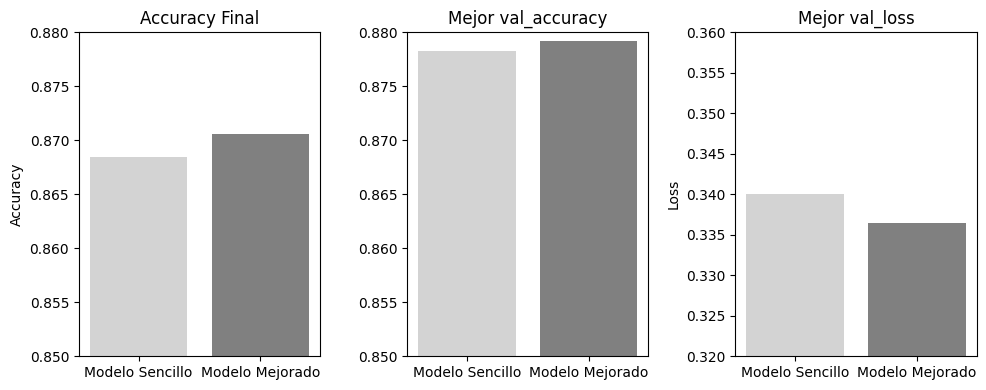

In [20]:
import matplotlib.pyplot as plt

metrica_1 = ['Modelo Sencillo', 'Modelo Mejorado']
accuracy_final = [0.8685, 0.8706]
val_accuracy = [0.8783, 0.8792]
val_loss = [0.3400, 0.3365]

# Gráfico 1: Accuracy Final
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.bar(metrica_1, accuracy_final, color=['lightgrey', 'grey'])
plt.ylim(0.85, 0.88)
plt.title('Accuracy Final')
plt.ylabel('Accuracy')

# Gráfico 2: Mejor val_accuracy
plt.subplot(1, 3, 2)
plt.bar(metrica_1, val_accuracy, color=['lightgrey', 'grey'])
plt.ylim(0.85, 0.88)
plt.title('Mejor val_accuracy')

# Gráfico 3: Mejor val_loss
plt.subplot(1, 3, 3)
plt.bar(metrica_1, val_loss, color=['lightgrey', 'grey'])
plt.ylim(0.32, 0.36)
plt.title('Mejor val_loss')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()